# An Analysis of Movie Performance, Part 2: Data Analysis and Presentation

In this part, you’ll use the datasets you gathered in Part 1 to explore what makes a movie successful. You’ll perform exploratory data analysis, create visualizations, and, where appropriate, fit simple statistical models.

The main goal is to discover patterns and communicate them clearly, not just to crunch numbers.

**Learning Objectives**  
By the end of this part, you should be able to:  
* Combine and clean multiple real-world datasets from different sources.  
* Conduct exploratory data analysis (EDA) with pandas and visualization libraries.  
* Apply basic statistical modeling to test hypotheses.  
* Communicate insights effectively to a non-technical audience.

In [77]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

-------------------

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  

#### import and clean data

In [78]:
movie_dataset= pd.read_csv('../data/movies_2015_2024.csv')
movie_dataset.head(3)

,Unnamed: 0,Year,Data,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,budget,revenue
0,0,2015,"{'adult': False, 'backdrop_path': '/kIBK5SKwgq...",False,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,2015-04-22,Avengers: Age of Ultron,False,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,1,2015,"{'adult': False, 'backdrop_path': '/gqrnQA6Xpp...",False,/gqrnQA6Xppdl8vIb2eJc58VC1tW.jpg,"[28, 12, 878]",76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,/hA2ple9q4qnwxp3hKVNhroipsir.jpg,2015-05-13,Mad Max: Fury Road,False,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340
2,2,2015,"{'adult': False, 'backdrop_path': '/jJKZaTBNen...",False,/jJKZaTBNenlFclQyjrnvzkRmvWE.jpg,"[16, 10751, 12, 18, 35]",150540,en,Inside Out,"When 11-year-old Riley moves to a new city, he...",13.9604,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,2015-06-17,Inside Out,False,7.910,22917,"['Animation', 'Family', 'Adventure', 'Drama', ...",175000000,857611174


In [79]:
##Clean up the dataframe to only have the columns with relevant data 
movie_dataset.columns
movie_dataset= movie_dataset[['Year', 'adult', 'original_language', 'original_title', 'popularity', 'vote_average', 'vote_count', 'genres', 'budget', 'revenue']]
movie_dataset.head(3)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340
2,2015,False,en,Inside Out,13.9604,7.910,22917,"['Animation', 'Family', 'Adventure', 'Drama', ...",175000000,857611174


# How popular is each genre over the years?

#### Clean up genre column of dataframe

In [80]:
#clean up genre column -> strip the square paranthesize and organize the groups 
#movie_dataset['genres'][0].replace('[', '').replace(']', '').replace("'", '').split(',')
#update the column with the new cleaner text 
#movie_dataset['genres'][0].replace('[', '').replace(']', '').replace("'", '').split(',')

clean_genre_info= []
count_genre_group= []
for row in movie_dataset['genres']:
    clean_genre= row.replace('[', '').replace(']', '').replace("'", '').split(',')
    clean_genre_info.append(clean_genre)
    count_genre_group.append(len(clean_genre))

movie_dataset['genres']= clean_genre_info
movie_dataset['n_genres']= count_genre_group
movie_dataset.head(3)

#explode the dataframe so each row only has one genre, but all genre info is kept for each movie
movie_genre_clean= movie_dataset.explode('genres')
movie_genre_clean.head(10)

#clean up genre test so it organizes correctly
movie_genre_clean['genres']= movie_genre_clean['genres'].str.lstrip().str.rstrip().str.lower()

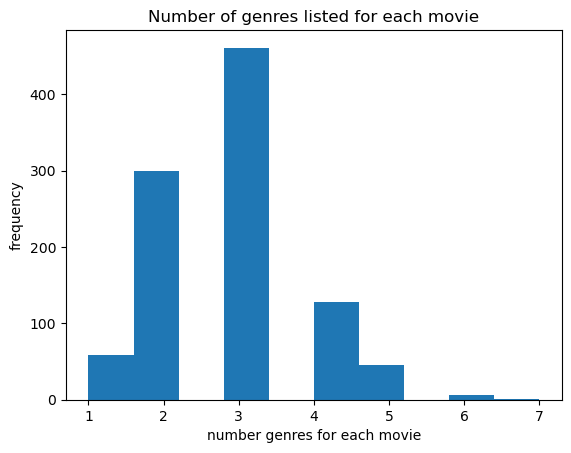

In [81]:
#visualize the number of genres for each movie, distribution 
fig_name= 'freq-number of genres listed.png'
fig, ax= plt.subplots()
ax.hist(movie_dataset['n_genres']);
ax.set_title('Number of genres listed for each movie');
ax.set_ylabel('frequency');
ax.set_xlabel('number genres for each movie');

plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

### What are the most common genre combinations (aka those genres will be overrepresented)

In [82]:
genre_list= movie_genre_clean['genres'].unique().tolist()
len(genre_list)

19

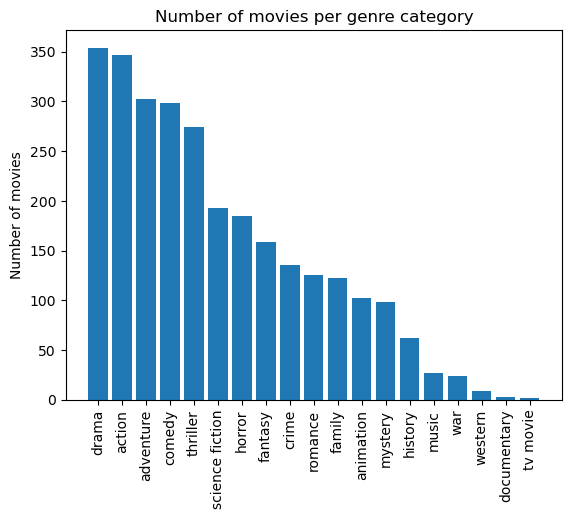

In [83]:
genre_counts= movie_genre_clean['genres'].value_counts()
plt.bar(genre_counts.index, genre_counts);
plt.xticks(rotation=90);
plt.ylabel('Number of movies');
plt.title('Number of movies per genre category');

fig_name= 'total number of movies per genre category.png'
plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

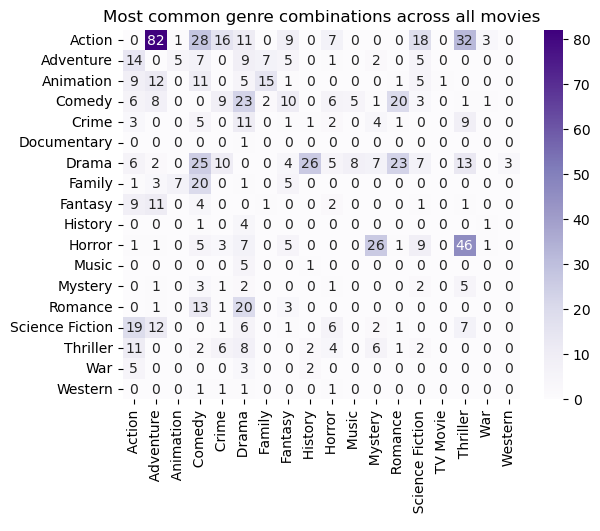

In [84]:
#clean up genre columns to get just the first two genres listed
movie_genre_split_col= movie_dataset['genres'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '').str.split(',', expand=True)

#clean up the genres column to make crosstabulation easier 


genre_combo_table= pd.crosstab(movie_genre_split_col[0], movie_genre_split_col[1])
movie_genre_split_col[0]=movie_genre_split_col[0].astype(str).str.lstrip().str.rstrip().str.lower()
movie_genre_split_col[1]=movie_genre_split_col[1].astype(str).str.lstrip().str.rstrip().str.lower()

#Remove all rows that do not have more than one genres
movie_genre_split_col= movie_genre_split_col[movie_genre_split_col[1]!='none']

#Make a crosstab to see the correlation between genres
genre_combinations= pd.crosstab(movie_genre_split_col[0], movie_genre_split_col[1]).unstack().sort_values(ascending=False).nlargest(20, keep='all')

sns.heatmap(genre_combo_table, annot=True,cmap='Purples', fmt='d');
plt.ylabel('')
plt.xlabel('')
plt.title('Most common genre combinations across all movies');

fig_name= 'heatmap-number of genre combos across all movies.png'
plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

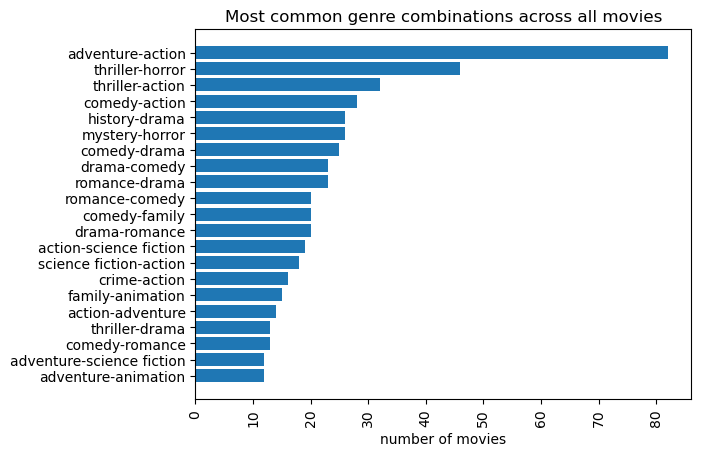

In [85]:
top_combo_table= pd.DataFrame(genre_combinations)

combo_name=[]
value_counts=[]
for row in top_combo_table.index: 
    combo_name.append(row[0] + "-" + row[1])
top_combo_table['combo']= combo_name
#top_combo_table.reset_index('combo')
top_combo_table= top_combo_table[['combo', 0]].set_index('combo').sort_values(0, ascending=True)
plt.barh(top_combo_table.index, top_combo_table[0]);
plt.xticks(rotation=90);
plt.title('Most common genre combinations across all movies');
plt.xlabel('number of movies');

fig_name= 'bar chart listed- most common genre combos.png'
plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

### How popular is each genre over the last decade?

In [86]:
movie_genre_clean.head(5)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,action,365000000,1405403694,3
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,adventure,365000000,1405403694,3
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,science fiction,365000000,1405403694,3
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,action,150000000,378858340,3
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3


In [87]:
movie_genre_clean_2=movie_genre_clean[(movie_genre_clean['genres'] != 'action' ) & (movie_genre_clean['genres'] != 'drama')]

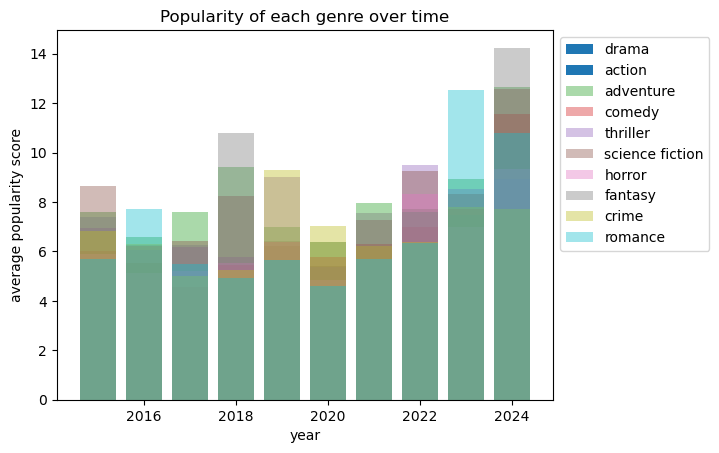

In [88]:
##select movie genre for dataframe 
movie_genre_clean= movie_genre_clean_2

##filter out just the top 10 genres with the most movies 
top_ten_genre= genre_counts.nlargest(10)
top_ten_genre.index

#create a list of genres
genre_list= movie_genre_clean['genres'].unique().tolist()
genre_list

#determine the average popuarity across all movies 
avg_pop= movie_dataset['popularity'].mean().round(2)
avg_pop

fig, ax= plt.subplots()
#ax.axhline(y=avg_pop, color='k') #create a vertlical line that is the average poularity score for ALL movies
ax.set_ylabel('average popularity score')
ax.set_xlabel('year')
ax.set_title('Popularity of each genre over time')
#create a for loop for graphing- groupby each genre and create a linegraph
for genre in top_ten_genre.index:
    #create a filtered dataframe for each genre
    genre_pop_time= movie_genre_clean[movie_genre_clean['genres'] == genre]

    #get the data for the graph by groupby year, and calculating mean and sem
    plot_summary= genre_pop_time.groupby('Year')['popularity'].agg(['mean', 'sem'])

    #make a line graph 
    ax.bar(plot_summary.index, plot_summary['mean'], label= genre, alpha=0.4)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

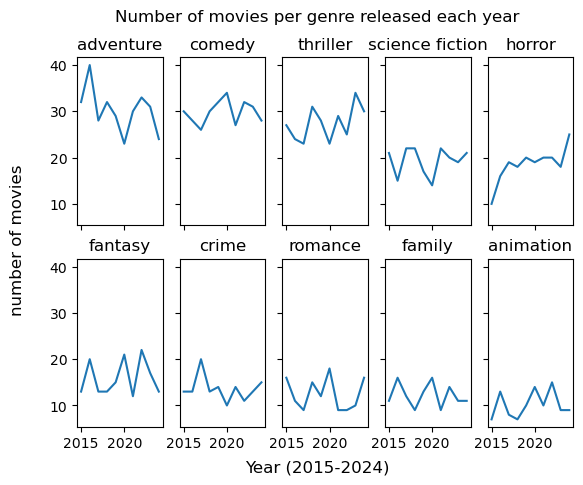

In [89]:
##select dataframe with clean genres
movie_genre_clean= movie_genre_clean_2

###

top_ten_genres= movie_genre_clean.groupby('genres')['genres'].value_counts().nlargest(10).index.to_list()
top_ten_genres

dataset_ten_genres= movie_genre_clean[movie_genre_clean['genres'].isin(top_ten_genres)]


fig,ax= plt.subplots(2, 5, sharey=True, sharex=True)
for round, genre in enumerate(top_ten_genres):
    genre_forplot= movie_genre_clean[movie_genre_clean['genres'] == genre]
    num_movie_per_year=genre_forplot.groupby('Year')['genres'].count()
    if round < 5:
        ax[0, round].plot(num_movie_per_year.index, num_movie_per_year.values)
        ax[0, round].set_title(f'{genre}')
    elif round >=5:
        ax[1, round-5].plot(num_movie_per_year.index, num_movie_per_year.values)
        ax[1, round-5].set_title(f'{genre}')
fig.suptitle('Number of movies per genre released each year');
fig.supylabel('number of movies');
fig.supxlabel('Year (2015-2024)');

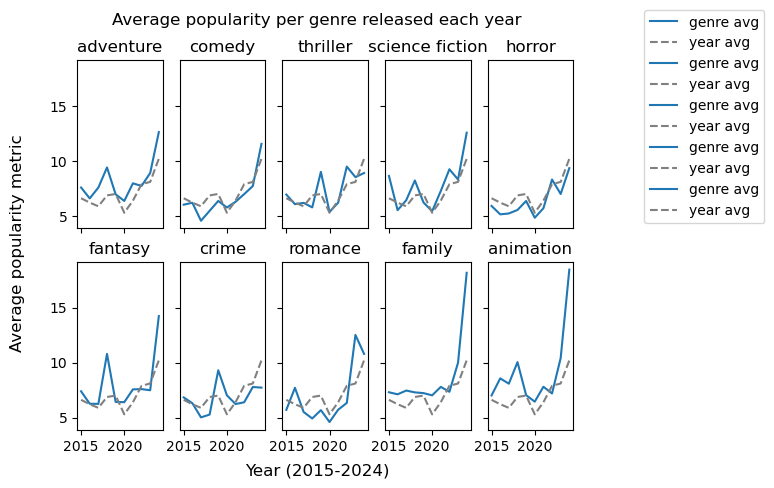

In [90]:
##select dataframe with clean genres
movie_genre_clean= movie_genre_clean_2
####

top_ten_genres= movie_genre_clean.groupby('genres')['genres'].value_counts().nlargest(10).index.to_list()
top_ten_genres

dataset_ten_genres= movie_genre_clean[movie_genre_clean['genres'].isin(top_ten_genres)]

#Caclulate the average popularity across all movies for each year, as a threshold metric
avg_year_pop_allmovies= movie_dataset.groupby('Year')['popularity'].mean().round(2)

fig,ax= plt.subplots(2, 5, sharey=True, sharex=True)
for round, genre in enumerate(top_ten_genres):
    genre_forplot= movie_genre_clean[movie_genre_clean['genres'] == genre]
    num_movie_per_year=genre_forplot.groupby('Year')['popularity'].mean()
    if round < 5:
        ax[0, round].plot(num_movie_per_year.index, num_movie_per_year.values, label='genre avg')
        ax[0, round].set_title(f'{genre}')
        ax[0, round].plot(avg_year_pop_allmovies.index, avg_year_pop_allmovies.values, color='0.5', linestyle="--", label='year avg')
    elif round >=5:
        ax[1, round-5].plot(num_movie_per_year.index, num_movie_per_year.values)
        ax[1, round-5].set_title(f'{genre}')
        ax[1, round-5].plot(avg_year_pop_allmovies.index, avg_year_pop_allmovies.values, color='0.5', linestyle="--")
fig.suptitle('Average popularity per genre released each year');
fig.supylabel('Average popularity metric');
fig.supxlabel('Year (2015-2024)');
fig.legend(loc='upper left', bbox_to_anchor=(1, 1));

fig_name= 'subplots- poularity over time top 10 genres.png'
plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

In [91]:
top_ten_genres

['adventure',
 'comedy',
 'thriller',
 'science fiction',
 'horror',
 'fantasy',
 'crime',
 'romance',
 'family',
 'animation']

-----------

In [92]:
best_picture= pd.read_csv('../data/best_pictures_sm.csv')
best_picture

,Unnamed: 0,Year of Film Release,Film,winner_status
0,0,1927/28,Wings,True
1,1,1927/28,7th Heaven,False
2,2,1927/28,The Racket,False
3,4,1928/29,The Broadway Melody,True
4,5,1928/29,Alibi,False
...,...,...,...,...
606,43,2024,Emilia Pérez,False
607,44,2024,I'm Still Here,False
608,45,2024,Nickel Boys,False
609,46,2024,The Substance,False


In [93]:
movie_genre_clean

combine_winner= pd.merge(movie_genre_clean, best_picture[['Film', 'winner_status']], left_on='original_title', right_on='Film', how='left')
len(combine_winner.groupby('Film')['Film'].count())

73

-----

exploratory questions: How does budget impact popularity?

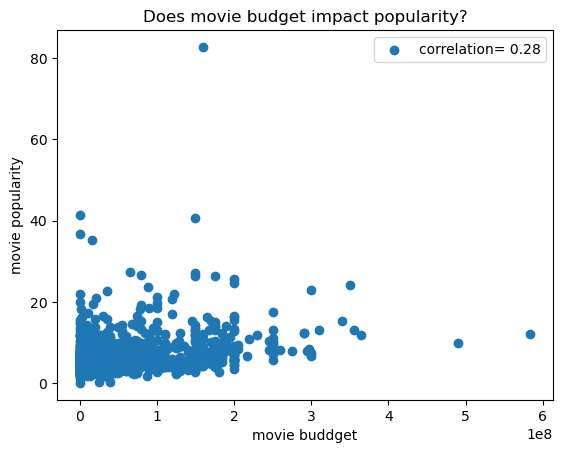

In [94]:
movie_dataset

correlation_coef= movie_dataset['budget'].corr(movie_dataset['popularity']);
plt.scatter(movie_dataset['budget'], movie_dataset['popularity'], label=f'correlation= {correlation_coef.round(2)}');
plt.ylabel('movie popularity');
plt.xlabel('movie buddget');
plt.title('Does movie budget impact popularity?');
plt.legend()
#plt.annotate(text= f'correlation ({correlation_coef.round(2)})', xy=(6, 100))

-----

2. **Performance Comparisons**  
    Use your merged dataset to examine whether recognition and awards are associated with better performance.  
    Investigate:  
    * Do Best Picture nominees or winners tend to earn higher box-office revenue than non-nominated movies?  
    * Are certain genres or types of roles more common among award-winning films?
    * (If you did the optional scrape) Do movies featuring a Best Actor or Best Actress winner in their cast tend to perform better?  
  
    Deliverables:  
    * At least one regression model 

## popularity or vote average -> predict revenue or winner_status?

### import dataframe where movie picture winners is included as a column

In [95]:
movie_genre_clean
combine_winner_genre= pd.merge(movie_genre_clean, best_picture[['Film', 'winner_status']], left_on='original_title', right_on='Film', how='left')
len(combine_winner_genre.groupby('Film')['Film'].count())

combine_winner.head(3)
combine_winner_genre['winner_status']=combine_winner_genre['winner_status'].fillna('false')
combine_winner.sample(10)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
1253,2020,False,en,I Still Believe,5.5679,7.600,1206,romance,12000000,16069730,3,NaN,NaN
1058,2020,False,en,Soul,11.8651,8.102,11015,fantasy,150000000,121977511,5,NaN,NaN
571,2017,False,en,A Dog's Purpose,4.3493,7.639,3449,adventure,22000000,205000000,5,NaN,NaN
947,2019,False,en,Dumbo,4.6243,6.591,4449,family,170000000,353284621,3,NaN,NaN
1095,2020,False,ja,劇場版「鬼滅の刃」無限列車編,12.8739,8.200,4310,animation,15700000,523542183,4,NaN,NaN
1564,2022,False,en,Babylon,5.7333,7.374,3528,comedy,78000000,65267446,2,NaN,NaN
1603,2022,False,en,Ambulance,4.2158,6.637,2301,crime,40000000,52303589,3,NaN,NaN
996,2019,False,en,Spies in Disguise,4.4248,7.570,2892,comedy,100000000,171616764,5,NaN,NaN
511,2017,False,en,Happy Death Day,2.6869,6.662,6403,horror,4800000,125479266,3,NaN,NaN
2010,2024,False,en,Longlegs,8.6447,6.567,2323,thriller,10000000,127961936,3,NaN,NaN


In [96]:
only_nom= combine_winner.dropna(subset='Film')
only_nom

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
2,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3,Mad Max: Fury Road,False
3,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,science fiction,150000000,378858340,3,Mad Max: Fury Road,False
11,2015,False,en,The Martian,9.0021,7.690,20579,adventure,108000000,631058917,3,The Martian,False
12,2015,False,en,The Martian,9.0021,7.690,20579,science fiction,108000000,631058917,3,The Martian,False
17,2015,False,en,The Revenant,9.0737,7.537,18777,western,135000000,532950503,3,The Revenant,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2024,False,en,Wicked,40.6156,6.909,2524,romance,150000000,757961815,3,Wicked,False
1993,2024,False,en,Wicked,40.6156,6.909,2524,fantasy,150000000,757961815,3,Wicked,False
2022,2024,False,fr,Emilia Pérez,3.4456,6.511,1832,thriller,26000000,16302703,2,Emilia Pérez,False
2061,2024,False,en,The Brutalist,10.8172,7.000,1393,history,9600000,50145227,2,The Brutalist,False


In [97]:
only_nom

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
2,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3,Mad Max: Fury Road,False
3,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,science fiction,150000000,378858340,3,Mad Max: Fury Road,False
11,2015,False,en,The Martian,9.0021,7.690,20579,adventure,108000000,631058917,3,The Martian,False
12,2015,False,en,The Martian,9.0021,7.690,20579,science fiction,108000000,631058917,3,The Martian,False
17,2015,False,en,The Revenant,9.0737,7.537,18777,western,135000000,532950503,3,The Revenant,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2024,False,en,Wicked,40.6156,6.909,2524,romance,150000000,757961815,3,Wicked,False
1993,2024,False,en,Wicked,40.6156,6.909,2524,fantasy,150000000,757961815,3,Wicked,False
2022,2024,False,fr,Emilia Pérez,3.4456,6.511,1832,thriller,26000000,16302703,2,Emilia Pérez,False
2061,2024,False,en,The Brutalist,10.8172,7.000,1393,history,9600000,50145227,2,The Brutalist,False


#### Does genre predict winner status?

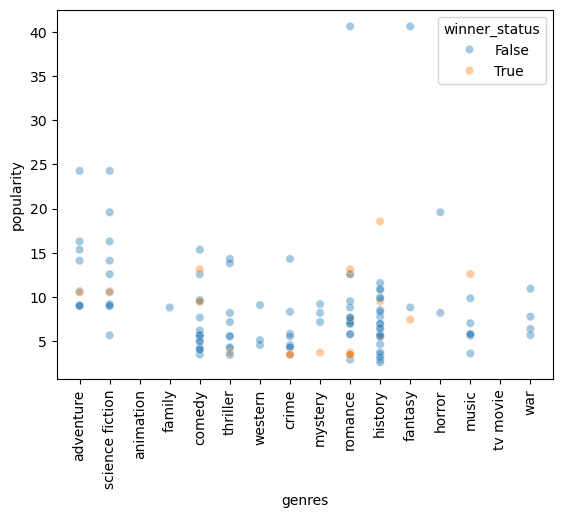

In [98]:
combine_winner
import seaborn as sns 
sns.scatterplot(x=combine_winner['genres'], y=combine_winner['popularity'], hue=combine_winner['winner_status'], alpha=0.4);
plt.xticks(rotation=90);

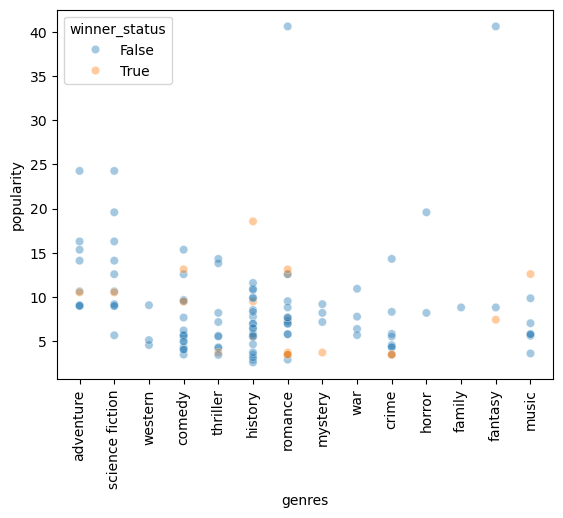

In [99]:
combine_winner
import seaborn as sns 
sns.scatterplot(x=only_nom['genres'], y=only_nom['popularity'], hue=only_nom['winner_status'], alpha=0.4);
plt.xticks(rotation=90);

## popularity or vote average -> predict revenue or winner_status?

In [100]:
best_picture.head(3)

,Unnamed: 0,Year of Film Release,Film,winner_status
0,0,1927/28,Wings,True
1,1,1927/28,7th Heaven,False
2,2,1927/28,The Racket,False


In [101]:
movie_dataset

movie_dataset_winner= pd.merge(movie_dataset, best_picture[['Film', 'winner_status']], left_on='original_title', right_on='Film', how='left')
movie_dataset_winner['winner_status']=movie_dataset_winner['winner_status'].fillna('not nominated')
movie_dataset_winner

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
0,2015,False,en,Avengers: Age of Ultron,11.8411,7.271,23847,"[Action, Adventure, Science Fiction]",365000000,1405403694,3,NaN,not nominated
1,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,"[Action, Adventure, Science Fiction]",150000000,378858340,3,Mad Max: Fury Road,False
2,2015,False,en,Inside Out,13.9604,7.910,22917,"[Animation, Family, Adventure, Drama, Comedy]",175000000,857611174,5,NaN,not nominated
3,2015,False,en,Jurassic World,11.8662,6.700,21094,"[Action, Adventure, Science Fiction, Thriller]",150000000,1671537444,4,NaN,not nominated
4,2015,False,en,The Martian,9.0021,7.690,20579,"[Drama, Adventure, Science Fiction]",108000000,631058917,3,The Martian,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2024,False,en,Miller's Girl,3.8256,6.348,880,"[Thriller, Drama, Romance]",4000000,1430985,3,NaN,not nominated
999,2024,False,pt,Ainda Estou Aqui,4.4395,7.951,861,"[Drama, History]",1480000,36109482,2,NaN,not nominated
1000,2024,False,en,Love Lies Bleeding,8.0038,6.572,856,"[Crime, Romance, Thriller, Drama]",10000000,12778225,4,NaN,not nominated
1001,2024,False,en,Arthur the King,3.2761,7.577,855,"[Adventure, Drama]",19000000,40829138,2,NaN,not nominated


### Relationship between 'popularity' and 'vote average'

C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Mullo\anaconda3\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._

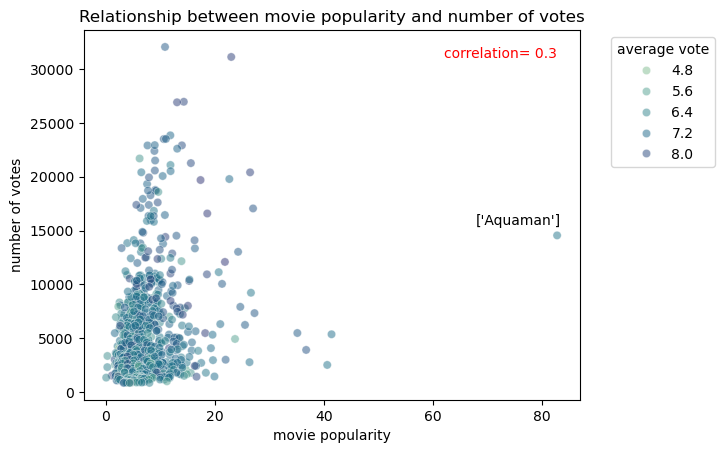

In [102]:

fig_title='Relationship between movie popularity and number of votes'
fig_name= 'corr movie pop and nvote w outlier.png'
x_value= movie_dataset['popularity']
xlabel_text='movie popularity'

y_value= movie_dataset['vote_count']
ylabel_text= 'number of votes'

hue_value= movie_dataset['vote_average']
hue_label='average vote'
color_map_choice= "crest"
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                palette=color_map_choice, 
                alpha= alpha_choice);

### put note for the weird outlier point 
outlier_name= movie_dataset[movie_dataset['popularity'] >= 80]['original_title']
outlier_x= movie_dataset[movie_dataset['popularity'] >= 80]['popularity']
outlier_y=movie_dataset[movie_dataset['popularity'] >= 80]['vote_count']
plt.annotate(text = outlier_name.tolist(), xy = (outlier_x-15,outlier_y+1000));

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), 
         y_value.max(), 
         f'correlation= {corr_coef.round(2)}', 
         ha='right', 
            va='top', 
            color='red');

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);

plt.savefig('../figures/'+ fig_name,
            bbox_inches='tight')

In [103]:
movie_dataset[movie_dataset['vote_count']>25000]

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres
100,2016,False,en,Deadpool,10.8683,7.623,32058,"[Action, Adventure, Comedy]",58000000,782837347,3
300,2018,False,en,Avengers: Infinity War,23.0112,8.235,31127,"[Adventure, Action, Science Fiction]",300000000,2052415039,3
400,2019,False,en,Joker,14.3120,8.100,26964,"[Crime, Thriller, Drama]",55000000,1078958629,3
401,2019,False,en,Avengers: Endgame,13.0723,8.237,26916,"[Adventure, Science Fiction, Action]",356000000,2799439100,3


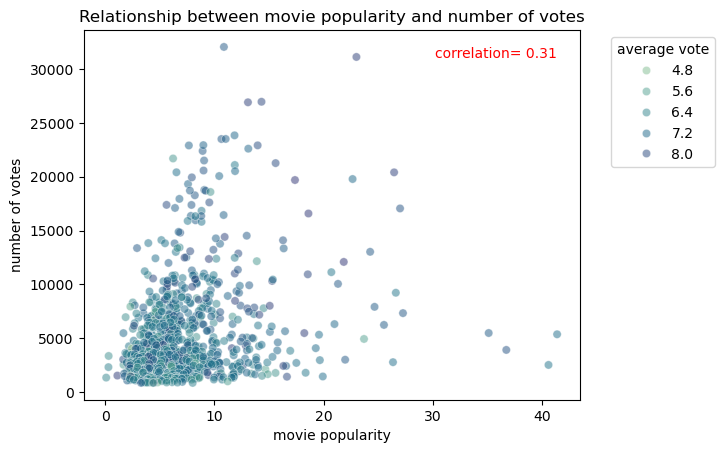

In [104]:
##remove the outlier
movie_clean= movie_dataset[movie_dataset['popularity'] <= 50]
###

fig_title='Relationship between movie popularity and number of votes'
fig_name= 'corr movie pop and nvote.png'
x_value= movie_clean['popularity']
xlabel_text='movie popularity'

y_value= movie_clean['vote_count']
ylabel_text= 'number of votes'

hue_value= movie_clean['vote_average']
hue_label='average vote'
color_map_choice= "crest"
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                palette=color_map_choice, 
                alpha= alpha_choice);

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name)

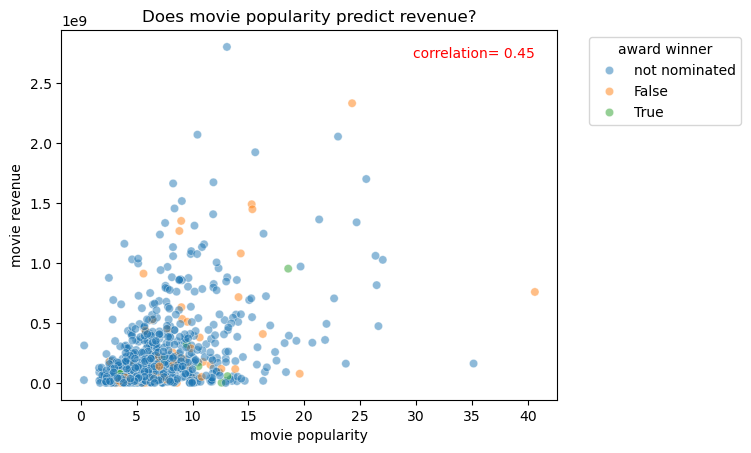

In [105]:
##remove the outlier
movie_clean= movie_dataset_winner[movie_dataset_winner['popularity'] <= 50]
movie_clean= movie_clean[movie_clean['revenue']!=0]
###

fig_title='Does movie popularity predict revenue?'
fig_name= 'corr pop and revenue with award status.png'
x_value= movie_clean['popularity']
xlabel_text='movie popularity'

y_value= movie_clean['revenue']
ylabel_text= 'movie revenue'

hue_value= movie_clean['winner_status']
hue_label='award winner'
#color_map_choice= "crest"
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
               
                alpha= alpha_choice); # palette=color_map_choice, 

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

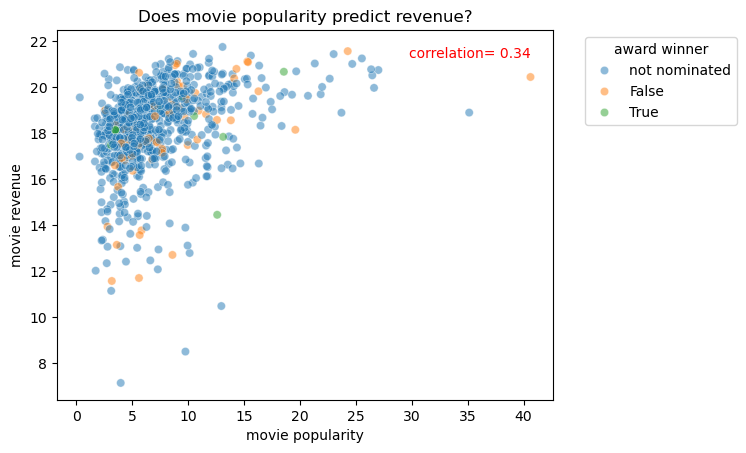

In [106]:
##remove the outlier
movie_clean= movie_dataset_winner[movie_dataset_winner['popularity'] <= 50]
movie_clean= movie_clean[movie_clean['revenue']!=0]
###

fig_title='Does movie popularity predict revenue?'
fig_name= 'log popularity and revenue x winner status.png'
x_value= movie_clean['popularity']
xlabel_text='movie popularity'

y_value= np.log1p(movie_clean['revenue'])
ylabel_text= 'movie revenue'

hue_value= movie_clean['winner_status']
hue_label='award winner'
#color_map_choice= 
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                
                alpha= alpha_choice);
#palette=color_map_choice, 

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

### Does popularity predict award performance?

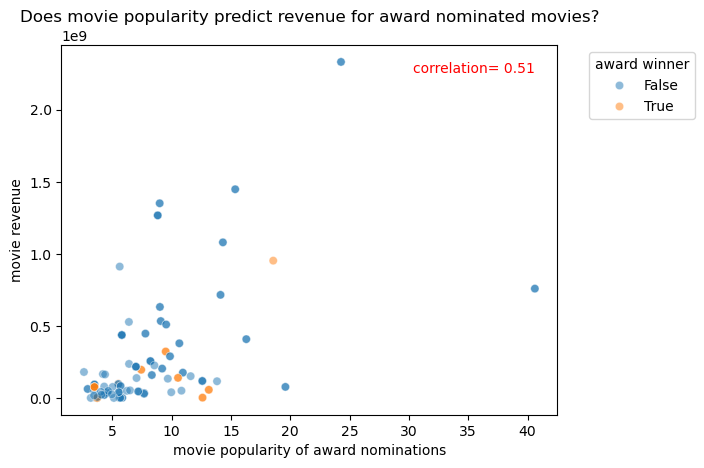

In [107]:
fig_title='Does movie popularity predict revenue for award nominated movies?'
fig_name= 'award winner- pop coorelate revenue.png'
x_value= only_nom['popularity']
xlabel_text='movie popularity of award nominations'

y_value= only_nom['revenue']
ylabel_text= 'movie revenue'

hue_value= only_nom['winner_status']
hue_label='award winner'
#color_map_choice= 
alpha_choice= 0.5

###make plot
movie_dataset
sns.scatterplot(x= x_value, 
                y= y_value, 
                hue= hue_value, 
                
                alpha= alpha_choice);
#palette=color_map_choice, 

#Make the coefficent 
corr_coef= x_value.corr(y_value)
plt.text(x_value.max(), y_value.max(), f'correlation= {corr_coef.round(2)}', ha='right', va='top', color='red')

#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');
plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

In [108]:
movie_dataset_winner.head(3)
only_nom.head(5)

,Year,adult,original_language,original_title,popularity,vote_average,vote_count,genres,budget,revenue,n_genres,Film,winner_status
2,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,adventure,150000000,378858340,3,Mad Max: Fury Road,False
3,2015,False,en,Mad Max: Fury Road,10.6392,7.627,23503,science fiction,150000000,378858340,3,Mad Max: Fury Road,False
11,2015,False,en,The Martian,9.0021,7.690,20579,adventure,108000000,631058917,3,The Martian,False
12,2015,False,en,The Martian,9.0021,7.690,20579,science fiction,108000000,631058917,3,The Martian,False
17,2015,False,en,The Revenant,9.0737,7.537,18777,western,135000000,532950503,3,The Revenant,False


### linear regression: Does movie popularity predict revenue AND award status?

In [109]:
import statsmodels.formula.api as smf

In [110]:
movie_dataset_winner['winner_status']= movie_dataset_winner['winner_status'].replace({"not nominated":False})
movie_dataset_winner['winner_status'].unique()

C:\Users\Mullo\AppData\Local\Temp\ipykernel_54864\1345714037.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movie_dataset_winner['winner_status']= movie_dataset_winner['winner_status'].replace({"not nominated":False})


array([False,  True])

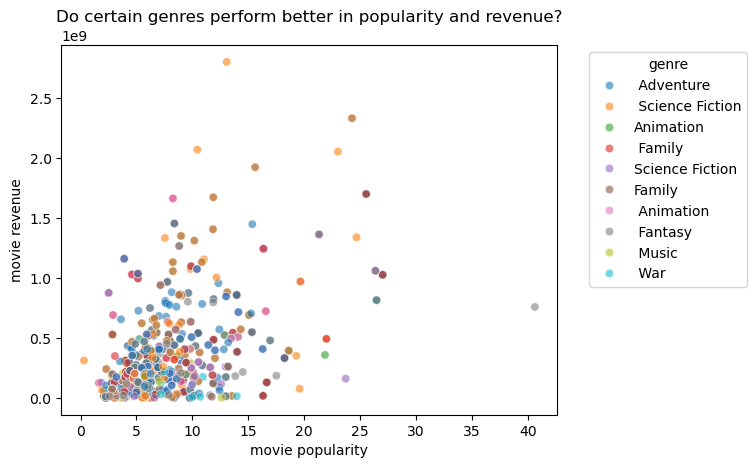

In [111]:
fig_title='Do certain genres perform better in popularity and revenue?'
fig_name= 'revenue and popularity by genre.png'

xlabel_text='movie popularity'
ylabel_text= 'movie revenue'
###

movie_clean= movie_dataset_winner[movie_dataset_winner['popularity'] <= 50]
movie_clean= movie_clean[movie_clean['revenue']!=0]
movie_clean.head(3)

movie_clean_genre= movie_clean.explode('genres')

top_genre_list= movie_clean_genre.groupby('genres')['popularity'].mean().nlargest(10, keep='all').index.tolist()

movie_clean_genre= movie_clean_genre[movie_clean_genre['genres'].isin(top_genre_list)]


sns.scatterplot(x= movie_clean_genre['popularity'], y=movie_clean_genre['revenue'], hue=movie_clean_genre['genres'], alpha=0.6)
#figure formatting
plt.legend(title='genre', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');

plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.savefig('../figures/'+ fig_name, bbox_inches='tight')

adventure
comedy
thriller
science fiction
horror
fantasy
crime
romance
family
animation


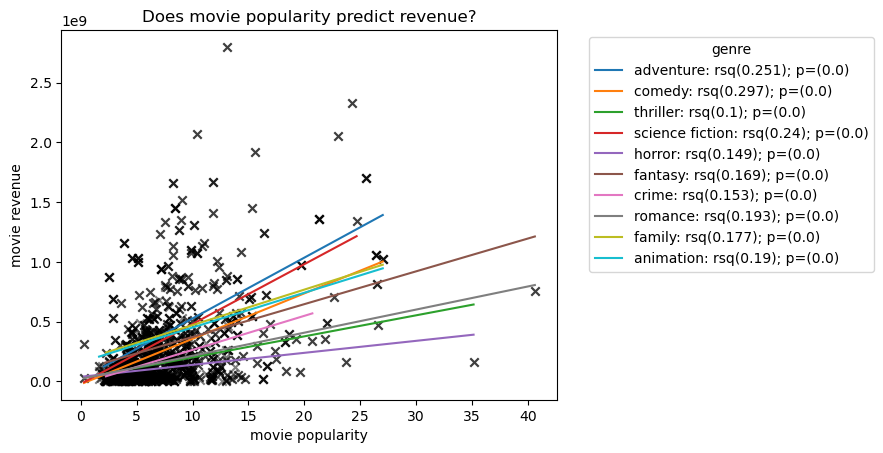

In [146]:
fig_title='Does movie popularity predict revenue?'
fig_name= 'regression- movie pop x revenue.png'

xlabel_text='movie popularity'
ylabel_text= 'movie revenue'
alpha_choice= 0.5

###########
#forloop for each genre
#### 

#clean up dataframe
genre_explode=movie_clean.explode('genres')
genre_explode['genres']= genre_explode['genres'].str.lower().str.strip()

fig, ax = plt.subplots()
for genre in top_ten_genres:
    print(genre)
    movie_clean_genre_model= genre_explode[genre_explode['genres']== genre]
    model_pop_rev = smf.ols("revenue~ popularity", data=movie_clean_genre_model).fit()
    model_pop_rev.summary()
    p_value_genre= model_pop_rev.pvalues['popularity'].round(3)
    
    pred_df = pd.DataFrame(
        {
            'popularity': np.linspace(start=movie_clean_genre_model['popularity'].min(), stop=movie_clean_genre_model['popularity'].max())
        }
    )
    
    pred_df['mean_estimate'] = model_pop_rev.predict(pred_df)
    model_rsquare= model_pop_rev.rsquared.round(3)

    ####
    #make figure
    ########
    
    ax.scatter(x=movie_clean_genre_model["popularity"], y=movie_clean_genre_model["revenue"],  alpha=0.5, color='black', marker='x')
    ax.plot(pred_df["popularity"], pred_df["mean_estimate"], label= f'{genre}: rsq({model_rsquare}); p=({p_value_genre})');

plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
plt.legend(title='genre', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');

plt.savefig('../figures/'+ fig_name, 
            bbox_inches='tight')

## [?] How to do rsqaured analysis with two predictors? Does that need to be an anova?

In [ ]:
pred_df = pd.DataFrame(
    {
        'popularity': np.linspace(start=movie_clean['popularity'].min(), stop=movie_clean['popularity'].max())
    }
)

pred_df['mean_estimate'] = model_pop_rev.predict(pred_df)
pred_df.head(2)
model_rsquare= model_pop_rev.rsquared.round(3)

In [ ]:
fig_title='Does movie popularity predict revenue?'
fig_name= 'regression- movie pop x revenue.png'

xlabel_text='movie popularity'
ylabel_text= 'movie revenue'
alpha_choice= 0.5

####
#make figure
########

fig, ax = plt.subplots()
ax.scatter(x=movie_clean["popularity"], y=movie_clean["revenue"], alpha=0.5)
ax.plot(pred_df["popularity"], pred_df["mean_estimate"], color="black");
ax.set_title("Does movie popularity predict revenue?");
ax.text(movie_clean['popularity'].max(), 
        movie_clean['revenue'].max(), 
        f'rsquare= {model_rsquare}', 
        ha='right', va='top', 
color='red')

plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);

plt.savefig('../figures/'+ fig_name, 
            bbox_inches='tight')

### Popularity does impact revenue, but it is not the main predictor since it only accounts for 20% of the variablility in revenue

### r-squared-> poplarity accounts for 20% of variation in revenue -> it is significant, but does not explain the majority of the variation in revenue. So there are potentially other factors that could be better used to explain revenue"

In [ ]:
only_nom.head(3)

In [ ]:
nom_model_pop_rev = smf.ols("revenue~ popularity", data=only_nom).fit()
nom_model_pop_rev.summary()

In [ ]:
pred_df = pd.DataFrame(
    {
        'popularity': np.linspace(start=only_nom['popularity'].min(), stop=only_nom['popularity'].max())
    }
)

pred_df['mean_estimate'] =nom_model_pop_rev.predict(pred_df)
pred_df.head(2)
model_rsquare= nom_model_pop_rev.rsquared.round(3)
model_rsquare

In [ ]:
fig_title='Does movie popularity predict revenue in award nominated films?'
fig_name= 'regression- movie pop x revenue only award.png'

xlabel_text='movie popularity'
ylabel_text= 'movie revenue'
alpha_choice= 0.5

####
#make figure
########

fig, ax = plt.subplots()
sns.scatterplot(x=only_nom["popularity"], y=only_nom["revenue"], hue=only_nom['winner_status'], alpha=0.5)
ax.plot(pred_df["popularity"], pred_df["mean_estimate"], color="black");
ax.set_title("Does movie popularity predict revenue?");
ax.text(only_nom['popularity'].max(), 
        only_nom['revenue'].max(), 
        f'rsquare= {model_rsquare}', 
        ha='right', va='top', 
color='red')

plt.ylabel(ylabel_text);
plt.xlabel(xlabel_text);
plt.title(fig_title);
#figure formatting
plt.legend(title=hue_label, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left');

plt.savefig('../figures/'+ fig_name, 
            bbox_inches='tight')

3. **Presentation**  
    Prepare a 10-12 minute presentation of your findings.  
    Your presentation should:  
    * Focus on findings and insights, not code.  
    * Tell a clear story: the questions you asked and what you found.  
    * Include visuals such as charts, summary tables, or model results.
    * Avoid screenshots of code or raw output. Think of your audience as studio executives or film analysts, not programmers.

    Your presentation should be done using PowerPoint/Google Slides or other presentation software.